## **MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   **NÚMERO DE EQUIPO:**
*     Equipo #83

---        
        
*   **MIEMBROS DEL EQUIPO:**
*     Ernesto Damián Favela Vela: A00738581
*     Gustavo Alejandro Garduño Macedo: A01795341
*     Julia Gabriela Pinedo: A01795315
*     Juan Manuel Rodríguez Mateos: A01794890

--- 

In [86]:
# Importar Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [87]:
#insurance_df = pd.read_csv('../data/insurance.csv')
insurance_df = pd.read_csv(r'../notebooks/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [88]:
# *************************** PARTE 0: Clasificación de estadísticas *****************************

# Opcional: Se creará una función para etiquetar las variables de acuerdo con la categoría a la 
# que pertenecen, para visualizarlos en una tabla.

def separate_variables_by_type(df):
    """
    Separar las columnas entre numéricas (dtype= int, float) y cualitativas (dtype= object)
    
    Args:
        df (DataFrame)
    
    Returns:
        numeric_df (tabla impresa clasificando a las variables numéricas)
        object_df (tabla impresa clasificando a las variables categóricas)
    """
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    # Se declara una lista vacía, la cual se utilizará para almacenar los datos en el dataframe
    # que se generará
    data_types = []
    
    # Ciclo "for" obtener los data types de cada una de las columnas
    for col in df.columns:
        if col in numeric_columns:
            data_type = "Numeric" # Etiqueta para el tipo "numérico"
        elif col in object_columns:
            data_type = "Object" # Etiqueta para el tipo "objeto"
        data_types.append((col, data_type)) # Guarda las etiquetas de las columnas en la lista
    
    # Crea un DataFrame para las columnas numéricas
    numeric_df = pd.DataFrame([i for i in data_types if i[1] == "Numeric"],
                                   columns=["Variable", "Categoría"])
    # Crea un DataFrame para las columnas de texto 
    object_df = pd.DataFrame([i for i in data_types if i[1] == "Object"],
                                  columns=["Variable", "Categoría"])
    
    # Imprimir las tablas con los datos
    print('Columnas del tipo "Numeric":')
    print(tabulate(numeric_df, headers="keys", tablefmt="psql", showindex=True))
    print('\n\n')
    print('Columnas del tipo "Object":')
    print(tabulate(object_df, headers="keys", tablefmt="psql", showindex=True))

In [89]:
# Se imprimen las columnas separadas por categoría.

columns_separated = separate_variables_by_type(df=insurance_df)

Columnas del tipo "Numeric":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | age        | Numeric     |
|  1 | bmi        | Numeric     |
|  2 | children   | Numeric     |
|  3 | charges    | Numeric     |
+----+------------+-------------+



Columnas del tipo "Object":
+----+------------+-------------+
|    | Variable   | Categoría   |
|----+------------+-------------|
|  0 | sex        | Object      |
|  1 | smoker     | Object      |
|  2 | region     | Object      |
+----+------------+-------------+


In [90]:
# Antes de generar las estadísticas descriptivas, es necesario realizar un análisis en las variables
# clasificadas como "Numéricas" y "Categóricas".

# Primero, para las variables numéricas:

# 1) age: es correctamente clasificada como numérica, debido a que la edad es un tipo de variable
# cuantitativa continua.
# 2) BMI: es correctamente clasificada como numérica, pues puede tomar un rango amplio de valores
# numéricos, incluyendo decimales (se calcula con el peso y altura de una persona).
# 3) número de hijos: es correctamente clasificada como numérica, sin embargo, es un tipo de 
# variable cuantitativa discreta; por lo que su análisis posterior sería más adecuado mediante
# gráficos de barra.
# 4) charges: los cargos realizados son una variable cuantitativa continua, debido a que éstos
# pueden variar pues no están restringidos a una cantidad única.

# Para las variables categóricas:

# 1) sex: es correctamente clasificaada como cualitativa, ya que representa dos categorías distintas.
# Se podría decir que es una variable cualitativa nominal.
# 2) smoker: esta variable es cualitativa nominal debido a que no existe un orden de clasificación
# implícito.
# 3 region: es correctamente clasificada como cualitativa, en específico, cualitativa nominal, debido
# a que solo representa categorías sin un orden específico o ranking.

# Al tener estas conclusiones, se procederá con la obtención de las estadísticas descriptivas.

In [91]:
# ****************************** PARTE 1: Resumen de estadísticas ********************************

"""Estadísticas descriptivas para las variables numéricas del DataFrame"""

# Se declara la función ".describe()" para obtener los datos estadísticos de las columnas que 
# se clasificaron como "numéricas".

num_columns = insurance_df.select_dtypes(include=['int', 'float']).columns

numerical_summary = insurance_df[num_columns].describe()
numerical_summary.T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [92]:
"""Estadísticas descriptivas para las variables categóricas del DataFrame"""

# Se obtienen los datos estadísticos de las columnas clasificadas como "categóricas".

obj_columns = insurance_df.select_dtypes(include=['object']).columns

object_summary = insurance_df[obj_columns].describe()
object_summary.T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [93]:
# ***************************** PARTE 1.1: Análisis de "children" *******************************

# Como se concluyó anteriormente, la variable "children" es del tipo cuantitativo discreto. Esta
# variable podría transformarse en "objeto" por la naturaleza de la misma, por ejemplo, para 
# interpretar los datos, para análisis y visualizaciones. Sin embargo, dados los requerimientos de
# la actividad, se conservarán sus propiedades numéricas para facilitar el uso de operaciones
# matemáticas en puntos posteriores. Se transformará la variable en "objeto" sin afectar al DF
# original y para visualizar su análisis estadístico únicamente.

children_as_obj = insurance_df.copy() # Copia para no afectar el DataFrame original

# Se transforma la columna a objeto
children_as_obj['children'] = children_as_obj['children'].astype('object')

# Se selecciona únicamente esa columna
children_as_obj = children_as_obj['children']
children_as_obj

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: object

In [94]:
# Estadísticas descriptivas para "children" como 'object' type

children_as_obj_summary = children_as_obj.describe()
children_as_obj_summary.T

count     1338
unique       6
top          0
freq       574
Name: children, dtype: int64

1b) Búsqueda de valores faltantes.

In [95]:
# ************************** PARTE 1: Porcentaje de Valores Faltantes ****************************

# Opcional: Se creará una función para obtener automáticamente el porcentaje de valores faltantes 
# por cada variable del DataFrame.

def find_missing_values_per_column(df):
    """
    Obtener el porcentaje de valores faltantes por columna e imprimirlo en una tabla
    
    Args:
        df (DataFrame)
    
    Returns:
        df_missing (tabla impresa con los porcentajes de valores faltantes por columna)
    """
    missing_percentage = df.isna().sum() * 100 / len(df)

    # Guardar en un DataFrame para su impresión en una tabla
    
    df_missing = pd.DataFrame({
        'Columna': df.columns,
        'Porcentaje Faltantes': missing_percentage.astype(str) + '%'
        # Imprime el valor con el símbolo "%"
    })
    
    # Imprimir una tabla con los datos
    print(tabulate(df_missing, headers='keys', tablefmt='psql', showindex=False))

In [96]:
# Se imprime la tabla de valores faltantes.

missing_values = find_missing_values_per_column(df=insurance_df)

+-----------+------------------------+
| Columna   | Porcentaje Faltantes   |
|-----------+------------------------|
| age       | 0.0%                   |
| sex       | 0.0%                   |
| bmi       | 0.0%                   |
| children  | 0.0%                   |
| smoker    | 0.0%                   |
| region    | 0.0%                   |
| charges   | 0.0%                   |
+-----------+------------------------+


In [97]:
# Se observa que ninguna columna posee valores faltantes, por lo que no es necesario
# descartar o imputar algún valor, debido a que el DataFrame ya se encuentra completo.

1c) Histogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas. 

In [98]:
# ******************* PARTE 0: Creación de funciones para obtener gráficas ***********************

# Se creará una función para obtener los histogramas de determinadas columnas de manera automática.

def print_histogram_and_boxplot_per_column(df, column_name):
    """
    Obtener histogramas por columna seleccionada
    
    Args:
        df (DataFrame): DataFrame a analizar
        column_name (str): Nombre de la columna con la que se generará el gráfico
    
    Returns:
        Impresión de los histogramas y boxplots
    """      
    # Crear una figura con dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Calcular la moda, mediana y media de cada columna
    mode_hist = df[column_name].mode() 
    median_hist = df[column_name].median()
    mean_hist = df[column_name].mean()

    # Graficar el histograma en el primer subplot
    sns.histplot(data=df, x=column_name, ax=ax1, kde=True, color='skyblue')
    ax1.set_title(f'Histograma de la columna "{column_name}"')
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Mostrar moda
    ax1.axvline(mode_hist[0], color='green', linestyle='--', linewidth=2, label='Moda')
    # Mostrar mediana
    ax1.axvline(median_hist, color='red', linestyle='-', linewidth=2, label='Mediana')
    # Mostrar media
    ax1.axvline(mean_hist, color='blue', linestyle='--', linewidth=2, label='Media')
    ax1.legend()
    
    # Graficar el boxplot en el segundo subplot
    sns.boxplot(data=df, x=column_name, ax=ax2, color='#f7dcf6')
    ax2.set_title(f'Boxplot de la columna "{column_name}"')
    ax2.grid(True, linestyle='--', alpha=0.7)

    # Ajustar espacio
    plt.tight_layout()

    # Mostrar las gráficas
    plt.show()

In [99]:
# Se creará una función para obtener las barras de determinadas columnas de manera automática.

def print_graph_bars_per_column(df, column_name):
    """
    Obtener histogramas por columna seleccionada
    
    Args:
        df (DataFrame): DataFrame a analizar
        column_name (str): Nombre de la columna con la que se generará el gráfico
    
    Returns:
        Impresión de las barras
    """
    # Crear un subplot
    fig, ax = plt.subplots()
    
    # Graficar las barras en el subplot
    sns.countplot(x=df[column_name], data=df)
    ax.set_title(f'Barras de la columna {column_name}')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Ajustar espacio
    plt.tight_layout()
    
    # Mostrar las gráficas
    plt.show()

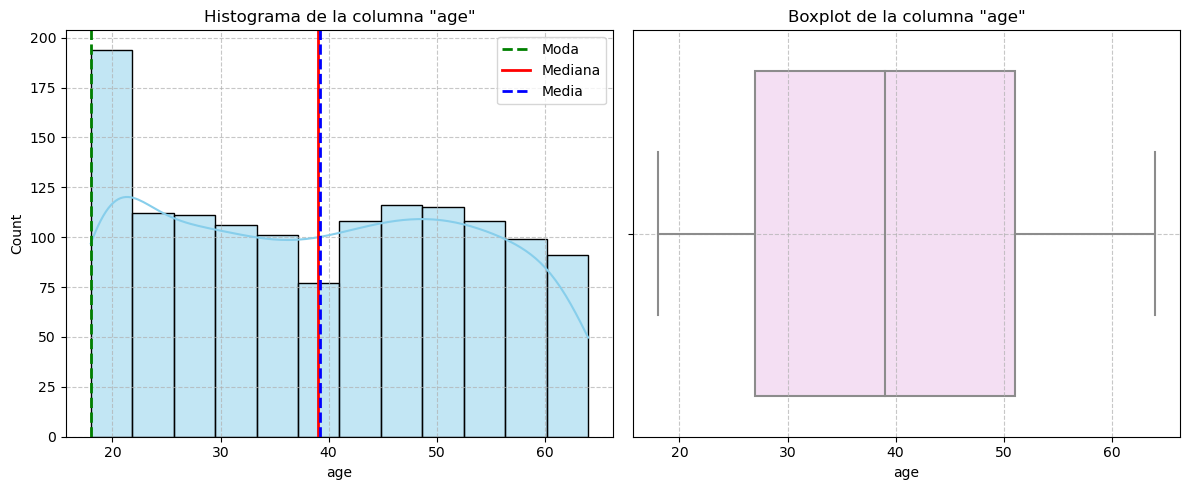

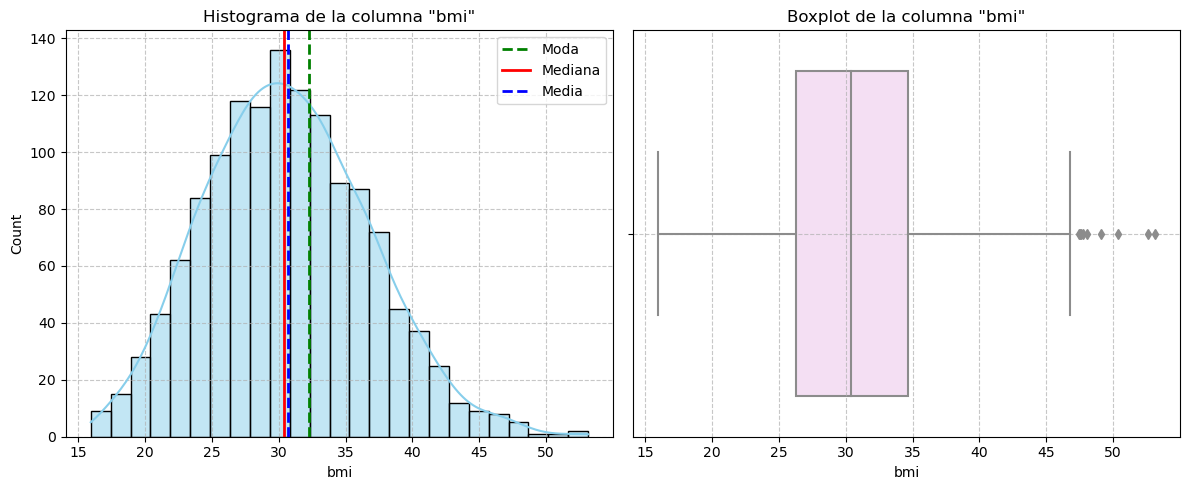

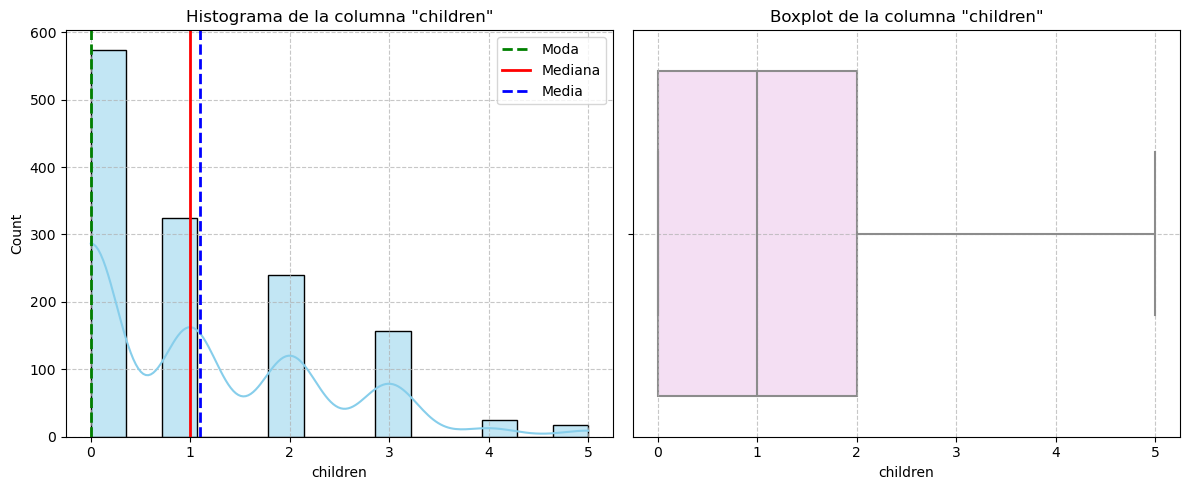

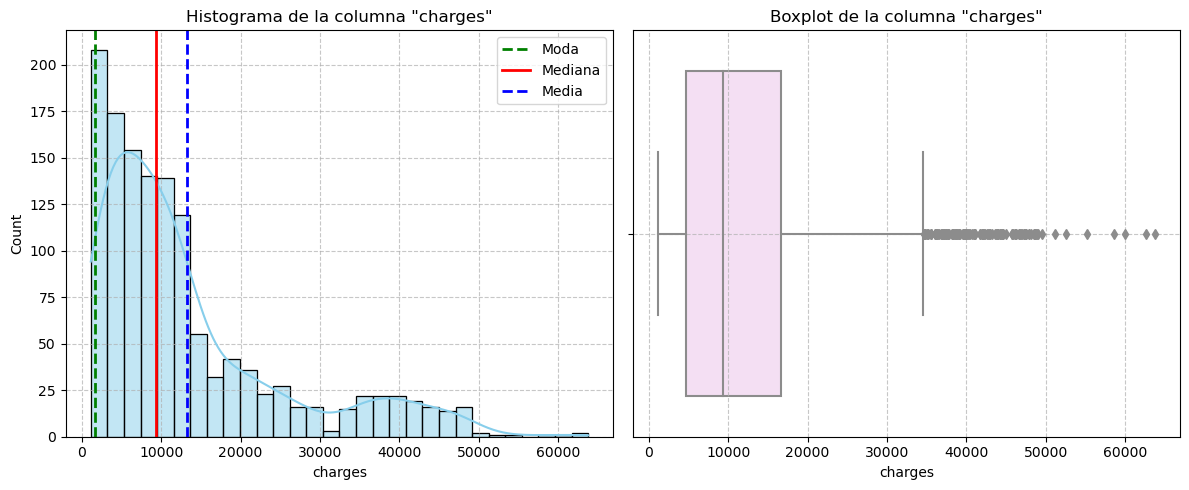

In [100]:
"""Imprimir Histogramas y Boxplots para columnas numéricas"""

# num_columns: anteriormente definida

for column_name in num_columns:
    print('\n')
    print_histogram_and_boxplot_per_column(df=insurance_df, column_name=column_name)

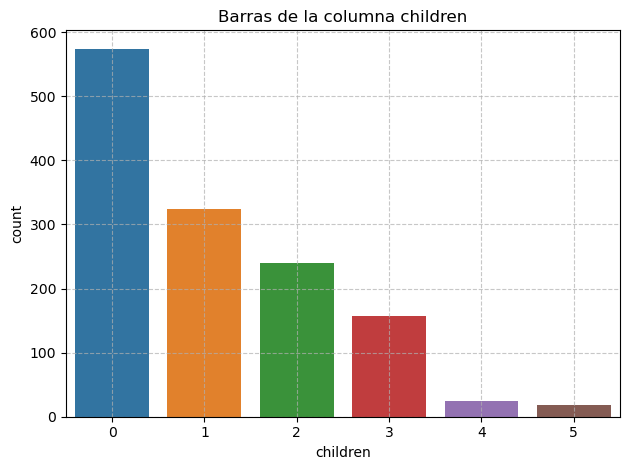

In [101]:
# Se observa que para la columna "children", al ser numérica discreta, sería conveniente
# la obtención de un gráfico de barras para realizar un mejor análisis de los datos.

print_graph_bars_per_column(df=insurance_df, column_name='children')

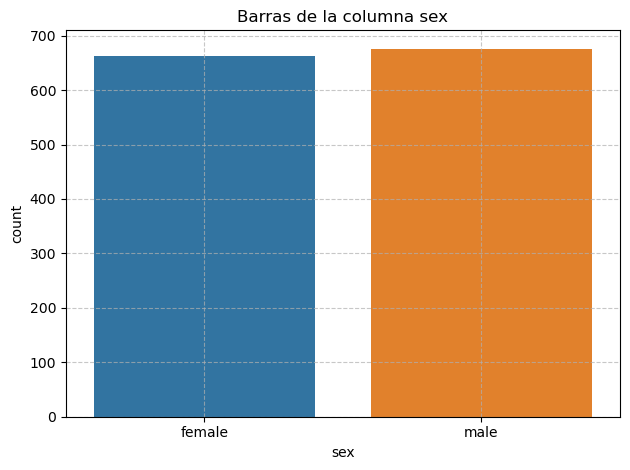

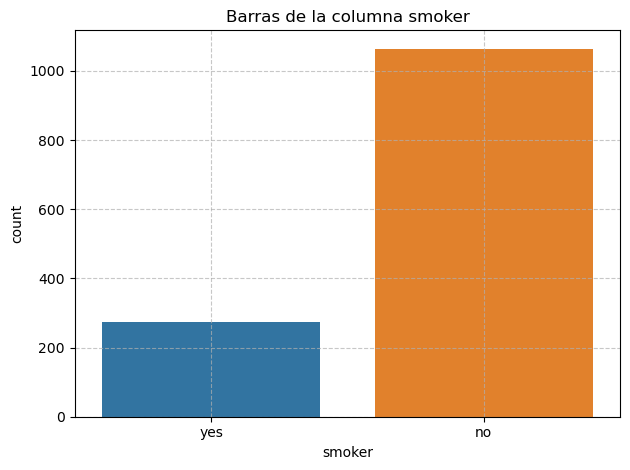

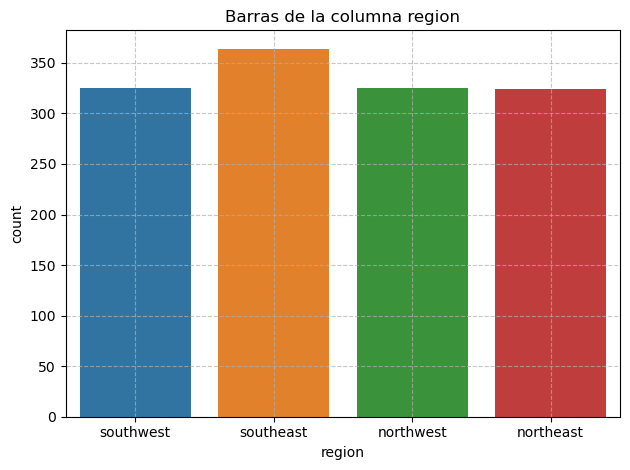

In [102]:
"""Imprimir Gráficas de Barras para columnas object"""

# obj_columns: anteriormente definida

for column_name in obj_columns:
    print('\n')
    print_graph_bars_per_column(df=insurance_df, column_name=column_name)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot. 

<Axes: xlabel='charges', ylabel='sex'>

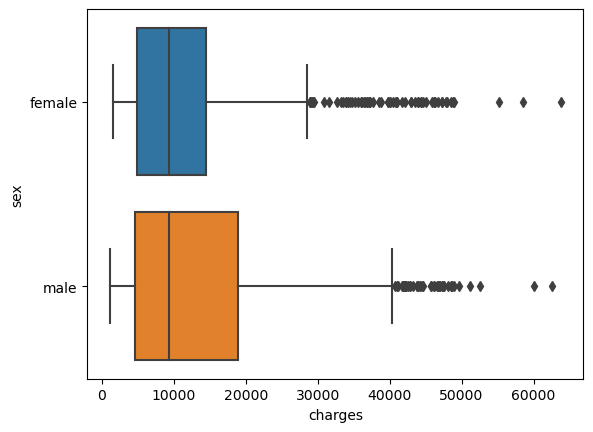

In [103]:
sns.boxplot(data=insurance_df, x='charges', y='sex')

- Las sexo son mas valores éxtremos para los hombres a comparación de las mujeres.
- La mediana de las primas entre hombres y mujeres es la misma

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico? 

<Axes: xlabel='bmi', ylabel='charges'>

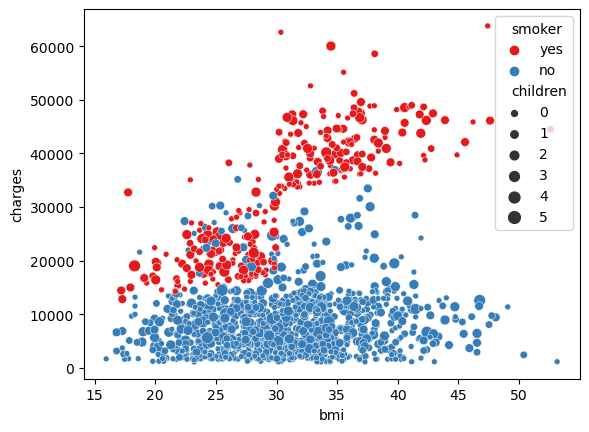

In [104]:
sns.scatterplot(y = "charges", x = "bmi", data = insurance_df, hue = "smoker", palette = "Set1", size = "children")

- Al parecer el valor de las prima varía de acuerdo a si la persona fuma o no, resultando en una interación entre el predictor y la variable de salida.
- Además al parecer la corelación entre las primas y el bmi es positiva. A mayor bmi, mayor prima. Esto mas marcado en fumadores.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas. 

<Axes: >

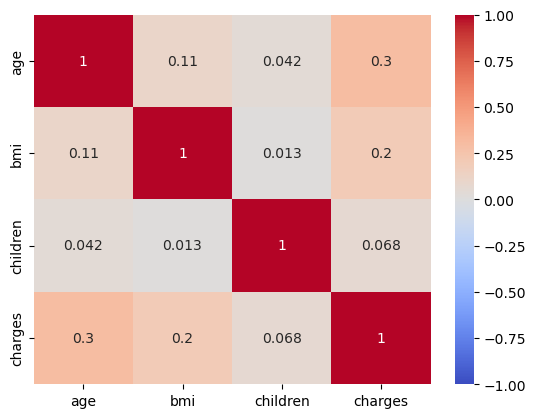

In [105]:
# Make a correlation heatmap for the data in a range of -1 to 1
corr = insurance_df[num_columns].corr()
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, center = 0, cmap = "coolwarm")

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`. 

3a) ¿Cuál es el promedio de `age` y de `bmi`? 

In [106]:
# *********************** PARTE 0: Obtención de DF de valores atípicos **************************

# Se creará una función para obtener un DataFrame a partir de los valores atípicos encontrados.
# Con dicho DataFrame, se creará el DF con las observaciones que tengan valores atípicos.

def create_dataframe_from_outliers(df, column_name):
    """
    Crear un dataframe a partir de los outliers encontrados
    
    Args:
        df (DataFrame)
        column_name (str)
    
    Returns:
        outliers_df (DataFrame): El DataFrame independiente con los outliers
    """    
    def find_outliers(data_series):
        """
        Buscar outliers en el DataFrame original
        
        Args:
            data_series (DataFrame)
        
        Returns:
            resultado de buscar los valores atípicos
        """
        # Se calcula el primer cuartil (Q1) para la columna
        percentile_25 = data_series.quantile(0.25)
        # Se calcula el tercer cuartil (Q3) para la columna
        percentile_75 = data_series.quantile(0.75)
        # Se calcula el rango intercuartil (IQR)
        iqr = percentile_75 - percentile_25
        # Se calcula el límite superior e inferior para valores atípicos
        # (outliers)
        upper_limit = percentile_75 + 1.5 * iqr
        lower_limit = percentile_25 - 1.5 * iqr
        # Retornar los resultados de buscar los valores atípicos 
        return data_series[(data_series < lower_limit) | (data_series > upper_limit)]
    
    # Utiliza la función anteriormente definida para encontrar los outliers en un DF
    outliers = find_outliers(df[column_name])
    
    # Crea un DataFrame independiente para los outliers
    outliers_df = pd.DataFrame({'Outliers': outliers}).copy()
    
    # Hacer un conteo de los valores atípicos e imprimirlos
    num_outliers = len(outliers)
    print(f'La cantidad de valores atípicos en la columna {column_name} es: {num_outliers}')
    print('\n')
    return outliers_df

In [107]:
# Se declara la función

outliers_df = create_dataframe_from_outliers(df=insurance_df, column_name= 'charges')
outliers_df

La cantidad de valores atípicos en la columna charges es: 139




,Outliers
14,39611.75770
19,36837.46700
23,37701.87680
29,38711.00000
30,35585.57600
...,...
1300,62592.87309
1301,46718.16325
1303,37829.72420
1313,36397.57600


In [108]:
# ****************** PARTE 0.1: Obtención de DF a partir de valores atípicos ********************

# Mediante al DF de Outliers creado anteriormente, se "mapearán" las filas para crear un DF con
# las 7 variables originales.

# Se crea una copia del DataFrame original para evitar afectarlo
insurance_df_copy = insurance_df.copy()

# Se mapean las filas
match = insurance_df_copy[insurance_df_copy['charges'].isin(outliers_df['Outliers'])].index

# Se construye el DF a partir de dichas filas donde se encuentran los 139 valores atípicos.
# Se reinicia el índice para continuidad en los datos.

insurance_outliers_df = insurance_df_copy.loc[match]
insurance_outliers_df = insurance_outliers_df.reset_index(drop=True)
insurance_outliers_df

,age,sex,bmi,children,smoker,region,charges
0,27,male,42.130,0,yes,southeast,39611.75770
1,30,male,35.300,0,yes,southwest,36837.46700
2,34,female,31.920,1,yes,northeast,37701.87680
3,31,male,36.300,2,yes,southwest,38711.00000
4,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
134,45,male,30.360,0,yes,southeast,62592.87309
135,62,male,30.875,3,yes,northwest,46718.16325
136,43,male,27.800,0,yes,southwest,37829.72420
137,19,female,34.700,2,yes,southwest,36397.57600


In [109]:
# A partir de este DataFrame se contestarán los incisos: 3a) y 3b)

""" Obteniendo el promedio de ´age´ y ´bmi´ """

# Se obtienen los promedios mediante la función ".mean()"
mean_age = insurance_outliers_df['age'].mean()
mean_bmi = insurance_outliers_df['bmi'].mean()

# Se guardan los promedios para imprimirlos en una Tabla
mean_summary = [
    ['Age', mean_age],
    ['BMI', mean_bmi]
]

print(tabulate(mean_summary, headers=['Columna', 'Promedio'], tablefmt='psql'))

+-----------+------------+
| Columna   |   Promedio |
|-----------+------------|
| Age       |    41.0791 |
| BMI       |    35.5646 |
+-----------+------------+


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores? 

Porcentaje de hombres y mujeres:

In [110]:
percentages_sex = insurance_outliers_df['sex'].value_counts(normalize=True) * 100
print(percentages_sex)

sex
male      64.028777
female    35.971223
Name: proportion, dtype: float64


Porcentaje de fumadores y no fumadores:

In [111]:
percentages_smokers = insurance_outliers_df['smoker'].value_counts(normalize=True) * 100
print(percentages_smokers)

smoker
yes    97.841727
no      2.158273
Name: proportion, dtype: float64


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`). 

In [112]:
X = insurance_df.drop(['charges'], axis=1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción. 

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=1,stratify=insurance_df['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [114]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

preprocessing = ColumnTransformer([
        ('num', numeric_transformer, make_column_selector(dtype_include=['number'])),
        ('cat', categorical_transformer, make_column_selector(dtype_include=['object']))
])


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`. 

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

regressor = Pipeline([('preprocess', preprocessing),
                        ('predict', LinearRegression())
                     ])

# Ajustar valores
lr_model = regressor.fit(X_train, y_train)

prediction_test = lr_model.predict(X_test)
prediction_test

array([11372.80813784, 27856.47143324,  9733.36589604, 18149.77573544,
        4115.25076074,  6439.18800356,  5842.83840001, 11254.23349345,
        1285.0475368 ,  9157.83835383, 35899.98732   , 10318.16997159,
        7924.72815152, 13538.1940813 ,  9350.12607262, 34893.71529415,
       33582.52198517, 12865.10975017, 12533.82749804,  6320.25214339,
       11620.65416763, 11427.89940767,  9520.80144131,  5526.78855404,
       32716.24918206, 11582.86825465, 31662.72316224, 15221.37497883,
       10636.09777416, 14006.34153079, 11706.06617927,  3043.41713084,
        9566.65081176, 10531.02693755,  8147.82243242, 32149.09962126,
       31942.70571431, 12970.40185847, 38809.81032194,   868.30764323,
       36931.97531227,  7275.08126077, 14100.698429  , 28967.84459543,
       31265.68907634, 32364.51826575, 35829.38025582,  5852.4372713 ,
        5784.72780964, 11802.01518083, 10963.66204996, 12324.63653858,
        6026.00279317, 17186.52754522,  6662.05867121,  7185.93660351,
      

In [116]:
# Importar Librerías

from sklearn import metrics

# Evaluar el error

RMSE_test = metrics.mean_squared_error(y_test, prediction_test, squared=False)
r2_test = metrics.r2_score(y_test, prediction_test)

# Imprimir MSE

print('Evaluación de lr_model en el conjunto de prueba: '
      '\nRMSE: {0:.10f}  R2: {1:.10f}'.format(RMSE_test, r2_test))

Evaluación de lr_model en el conjunto de prueba: 
RMSE: 5698.7597845324  R2: 0.7538547215


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`. 


In [119]:
#Obteniendo el conjunto de valores mayor o igual al limite superior
Q1 =  insurance_df['charges'].quantile(0.25)
Q3 =  insurance_df['charges'].quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
upper_limit_y_train = y_train.apply(lambda x: min(x, upper_limit))
upper_limit_y_test = y_test.apply(lambda x: min(x, upper_limit))


#Creando el pipeline
lr_model2 = Pipeline([
    ('preprocess', preprocessing),
    ('predict', LinearRegression())
])

#Ajustando el modelo al nuevo conjunto de evaluación  
lr_model2.fit(X_train, upper_limit_y_train)

#Generando predicciones en base a los nuevos parametros
upper_limit_prediction_test = lr_model2.predict(X_test)

# Evaluando el rendimiento del nuevo modelo
upper_limit_RMSE_test = metrics.mean_squared_error(upper_limit_y_test, upper_limit_prediction_test, squared=False)
r2_test2 = metrics.r2_score(upper_limit_y_test, upper_limit_prediction_test)

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`. 

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Define el transformador preprocessing2 con StandardScaler para numéricas y OrdinalEncoder para categóricas
preprocessing2 = ColumnTransformer([
    ('num', StandardScaler(), make_column_selector(dtype_include=['number'])),
    ('cat', OrdinalEncoder(), make_column_selector(dtype_include=['object']))
])

# Crea un nuevo pipeline (lr_model3) con preprocessing2 y regresión lineal
lr_model3 = Pipeline([
    ('preprocess', preprocessing2),
    ('predict', LinearRegression())
])

# Ajusta el nuevo modelo a los conjuntos de datos actualizados (sin outliers)
lr_model3.fit(X_train, y_train_no_outliers)

# Realiza predicciones en el conjunto de prueba con el nuevo modelo
prediction_test3 = lr_model3.predict(X_test)

# Evalúa el rendimiento del nuevo modelo
RMSE_test3 = metrics.mean_squared_error(y_test_no_outliers, prediction_test3, squared=False)
r2_test3 = metrics.r2_score(y_test_no_outliers, prediction_test3)

# Imprime los resultados del nuevo modelo
print('Evaluación de lr_model3 en el conjunto de prueba (sin outliers) con preprocessing2:')
print(f'RMSE: {RMSE_test3:.10f}, R2: {r2_test3:.10f}')

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

best_degree = None
best_r2 = -float('inf')
best_lr_model4 = None

for degree in range(1, 6):  # Puedes ajustar el rango de grados según tus necesidades
    # Definir las transformaciones para variables numéricas y categóricas
    numeric_transformer = PolynomialFeatures(degree=degree, include_bias=False)
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combinar las transformaciones en un ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, make_column_selector(dtype_include=['number'])),
            ('cat', categorical_transformer, make_column_selector(dtype_include=['object']))
        ])

    # Crear un pipeline con las transformaciones y el modelo de regresión lineal
    lr_poly = LinearRegression()
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', lr_poly)])

    # Ajustar el modelo de regresión lineal con características polinomiales
    pipeline.fit(X_train, y_train_no_outliers)

    # Realizar predicciones en el conjunto de prueba
    prediction_poly = pipeline.predict(X_test)

    # Evaluar el rendimiento del modelo
    r2_poly = metrics.r2_score(y_test_no_outliers, prediction_poly)

    # Actualizar el mejor modelo si se encuentra un grado con un mejor R²
    if r2_poly > best_r2:
        best_r2 = r2_poly
        best_degree = degree
        best_lr_model4 = pipeline

# Imprimir el grado que produjo el mejor rendimiento
print(f"Mejor grado polinomial: {best_degree}")

# Imprimir los resultados del mejor modelo
prediction_poly_best = best_lr_model4.predict(X_test)
RMSE_poly_best = metrics.mean_squared_error(y_test_no_outliers, prediction_poly_best, squared=False)
r2_poly_best = best_r2
print('Evaluación de lr_model4 (Regresión Polinomial) en el conjunto de prueba:')
print(f'RMSE: {RMSE_poly_best:.10f}, R2: {r2_poly_best:.10f}')